# Crater Detection for Terrain Relative Navigation on Moon & Mars

**Creating AI-Enabled Systems**

***Research Project***

John Ware <br>
08 April 2022



<hr style="border-top: 3px solid black; margin-top: 10px; margin-bottom: 10px"></hr>

## Overview
**Project Question:** 
How might computer vision be used in detecting craters on planetary surfaces like the Moon and Mars? 
 
Terrain relative navigation (TRN) is an important tool in the absence of GNSS-type services like GPS. If the terrain of a given object is understood, and an image of the object is captured from a known perspective, the image can be compared to the terrain model to determine a position estimate. This is a technique that has been used on several interplanetary space missions for hazard avoidance when on close approach or during descent to a planetary body. 

Images from NASA spacecraft like the Lunar Reconnaissance Orbiter (LRO) and Mars Reconnaissance Orbiter (MRO) can be used as a high resolution model for various regions of these planetary surfaces. Both Mars and the Moon are covered in craters among a mostly unchanging landscape. By using a labeled dataset, these images of the planetary surfaces can train a computer vision model to detect craters. Additional images from these missions can be used to test this model and determine performance metrics. From here, the detected craters can be output into various formats. The frame locations within the image can be stored into dataframes for further analysis and localization. The individual crater frames can be output as new images for comparison to databases of known craters. 

This project will explore the use of the YOLOv5 framework for crater detection. LRO and MRO imagery will be used to train a YOLO model, and additional images will be passed into this model for validation and performance metrics. The crater detection outputs will be shown in formats that will be useful for future analysis and deployment into operational terrain relative navigation capabilities. This approach will follow the 6D framework, addressing the 6 steps necessary to the development of an AI-enabled system. 

## Decomposition
The broader terrain relative navigation problem can be decomposed into several phases. LRO has created a high resolution model of the moon with a variety of instruments - optical, LIDAR, and radar. Individual missions can take images of the surface on their descent to the surface. These images can be passed through an object detection algorithm to detect and identify craters. These crater patterns can then be compared to the model created by LRO to identify where on the surface they are. Then latitude and longitude can be calculated. Lastly, information about onboard sensors can be used to back out altitude based on image resolution and pixel size.

The general process is as follows: 
1. LRO and MRO imagery used to create and train model on crater detection  
2. Individual space missions can take images of the surface during descent  
3. The model can be used to detect craters in each image (and video stream in the future)  
4. Detected craters can be output in two formats:  
    a. Frame location within the image  
    b. Frame image of individual crater  
5. If a crater identification database/model exists, individual crater images can be used as inputs to the model for global position/region estimation of the crater
6. By knowing the spacecraft & sensor position and orientation, frame outputs can be transposed to determine relative position vectors for corners of image
7. Latitude and longitude bounds can be calculated from these positional frame estimates

This project will focus on steps 1 through 4. Steps 5, 6, and 7 all require additional data and spacecraft knowledge that does not currently exist or is not available for this use. Steps 1 through 4 utilize Artificial Intelligence and Machine Learning algorithms used for computer vision, whereas steps 5 through 7 are more software- and sensor-focused; these will be reserved for future work and deployments. The image below depicts the various phases of navigation prior to descent; this project is focused on the global position estimation phase.  

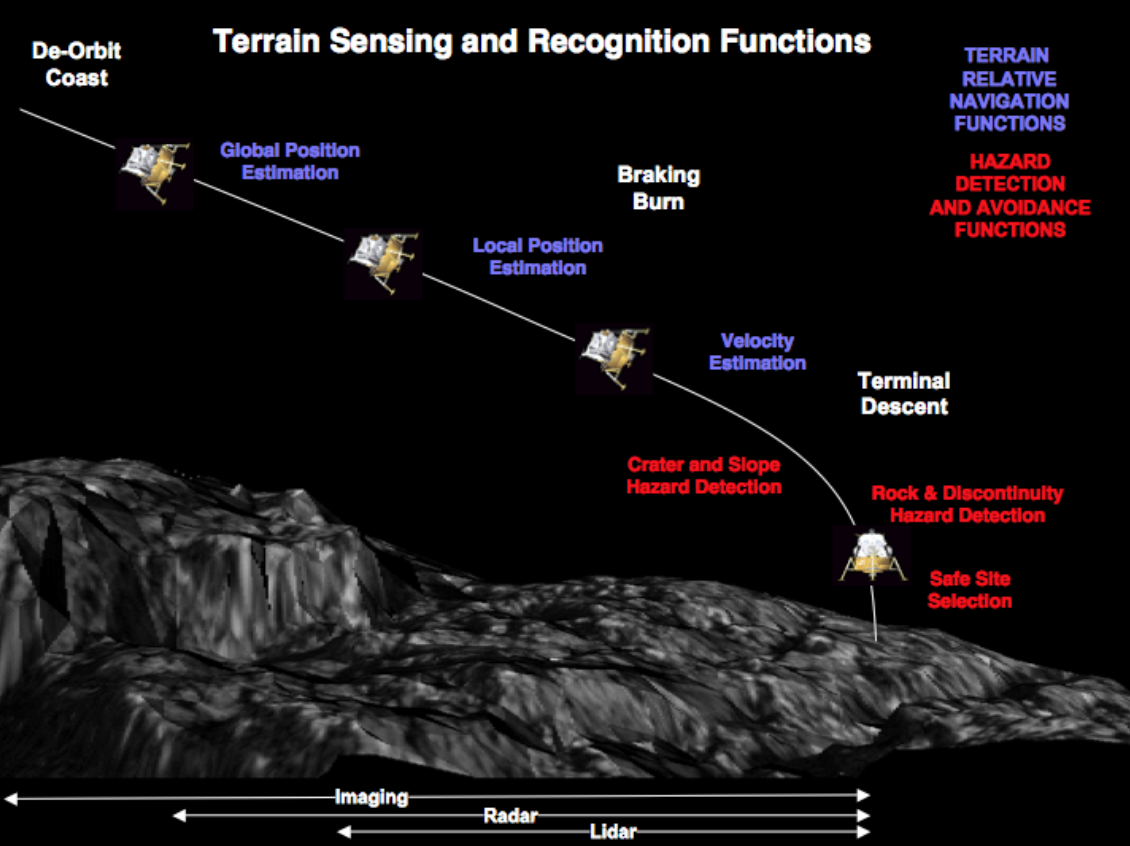
*Image used from: Overview of Terrain Relative Navigation Approaches for Precise Lunar Landing: A. E. Johnson and J. F. Montgomery. SciTech 2020 Forum, Orlando, Florida, 2020.*

## Domain Expertise
Domain expertise is critical for this sort of terrain relative navigation. The Moon and Mars are both difficult operating environments, and GNSS signals do not exist. Since the Moon has no atmosphere or weather, it is a relatively static environment, which lends itself well to crater identification and recognition for TRN. Mars is in a similar category, though the wind storms on Mars do affect the landscape over time; this could have an outsize effect on smaller craters and features. 

It is also important to have an understanding of the types and sources of data that exist for Mars and Moon research. Given the limited number of science missions that have been deployed to these regimes, there is a relatively small amount of data available for analysis. Shading on both bodies can greatly affect the ability to detect and identify craters, as various times of day will change the way the landscape looks in an image. This phase of terrain relative navigation will assume that an imager is aligned with the center of the planetary body during peak lighting, meaning the image is parallel to the surface of the body, and the field is well-lit with minimal shadows. 

A summary of the necessary domain expertise for TRN problems: 
* Lunar & Martian environments
* Day/Night schedules & variation
* Image resolution comparisons between each instrument on MRO and LRO
* Basic orbital dynamics for pointing, shadows, navigation
* Computer vision and machine learning; training models and identifying objects


## Data

The dataset used for this project was selected from Kaggle: https://www.kaggle.com/datasets/lincolnzh/martianlunar-crater-detection-dataset. This dataset includes lunar images collected from LRO, and Mars images collected from NASA missions like Mars Reconnaissance Orbiter (MRO). The set includes 98 training images from the Moon and Mars, along with their associated label data for crater detection. This is far fewer than what is generally considered a robust dataset (> 2500 images) for a YOLO model, but available data is currently limited to NASA space missions. 

The testing data consists of 19 images and their associated frame locations. These images will be passed through a trained model to detect craters. The frame locations for the detected craters will then be compared to the truth values to determine how well the model performs. 

Example images from this dataset are shown below.

In [1]:
# Import standard libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os

In [2]:
# Set Working Folder (CHANGE as needed)
wdir = '/Users/jware/Documents/School/AI_Systems/workspace/aisys/research_project'

Sample of Images:


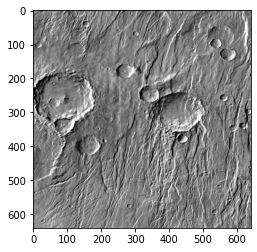

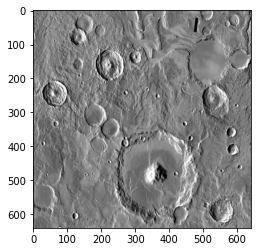

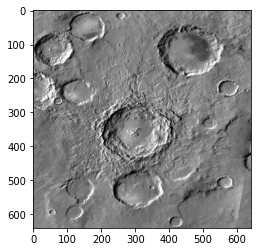

In [3]:
# Show sample images
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt

img_path = wdir + '/test/images2/' #sample image directory
print('Sample of Images:')

i = 1
for image in os.listdir(img_path):
    temp_path = os.path.join(img_path, image)
    if os.path.isfile(temp_path) and i < 4 and image != '.DS_Store': #check if img, not folder
        img = cv2.imread(temp_path)
        i+=1
        plt.imshow(img)
        plt.show()

## Design 
This design portion will focus on building the model and detecting craters. The following steps will be performed: 
1. Set up and build model    
2. Train model  
3. Test model  
4. Output detected craters

### Set Up Environment
This environment was created using the example dataset and associated YOLOv5 framework. This code from https://www.kaggle.com/code/lincolnzh/train-sample-with-yolov5/notebook was used as a guide and modified for this project. The cells that are used to set up the environment are commented out for subsequent runs. 

In [4]:
# Download and install the necessary yolov5 files
#!git clone https://github.com/ultralytics/yolov5 #clone github
#!pip install -U -r yolov5/requirements.txt #install requirements

#If you have already run this cell, the output should say that requirements are already satisfied

The following cell will download the necessary data and folder structure for this project. A user should only run this cell once. 

In [5]:
# Download folder structure & dataset
#!curl -L "https://app.roboflow.com/ds/UJBHpE2l1O?key=MrCqZfLS8q" > roboflow.zip; unzip roboflow.zip; rm roboflow.zip

In [6]:
#%cd $wdir'/yolov5/' #change directory
%cd $wdir
%cd yolov5

import torch
from yolov5 import utils
display = utils.notebook_init()  # checks

YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0 CPU


Setup complete ✅ (8 CPUs, 16.0 GB RAM, 62.0/460.4 GB disk)


Weights and Biases will be used for metrics and statistics. This account is linked to the Github repository created for the course. This feature enables more detailed data analytics for complex systems models. This feature will be helpful for future work and the deployment of this system, as input data becomes more complex and training data grows. 

In [7]:
#%pip install -q wandb #Uncomment if running for first time
import wandb
wandb.login()

wandb: Currently logged in as: jware11. Use `wandb login --relogin` to force relogin


True

### Train Model

In [8]:
!python train.py --img 640 --batch 16 --epochs 200 --data ../data.yaml --weights yolov5s6.pt --cache

wandb: Currently logged in as: jware11. Use `wandb login --relogin` to force relogin
train: weights=yolov5s6.pt, cfg=, data=../data.yaml, hyp=data/hyps/hyp.scratch-low.yaml, epochs=200, batch_size=16, imgsz=640, rect=False, resume=False, nosave=False, noval=False, noautoanchor=False, noplots=False, evolve=None, bucket=, cache=ram, image_weights=False, device=, multi_scale=False, single_cls=False, optimizer=SGD, sync_bn=False, workers=8, project=runs/train, name=exp, exist_ok=False, quad=False, cos_lr=False, label_smoothing=0.0, patience=100, freeze=[0], save_period=-1, local_rank=-1, entity=None, upload_dataset=False, bbox_interval=-1, artifact_alias=latest
github: up to date with https://github.com/ultralytics/yolov5 ✅
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0 CPU

hyperparameters: lr0=0.01, lrf=0.01, momentum=0.937, weight_decay=0.0005, warmup_epochs=3.0, warmup_momentum=0.8, warmup_bias_lr=0.1, box=0.05, cls=0.5, cls_pw=1.0, obj=1.0, obj_pw=1.0, iou_t=0.2, anchor_t=4.0, fl_gamma=0.0, 

The train command takes inputs for batch size, image size, and weights. This creates additional folders within the training directory to store the results on each run. 

### Test Model - Detect Craters

We can test the model on a small subset of unseen data to determine initial performance and verify output formats. 

In [9]:
#Set paths
wpath = wdir + '/yolov5/runs/train/exp/weights/best.pt' #weight path
spath = wdir + '/test/images' #source path - Full image set
#spath = wdir + '/test/images2' #source path - Partial image set

# Run test images through algo
!python detect.py --weights $wpath --img 1280 --conf 0.5 --source $spath --save-txt --save-conf --save-crop

detect: weights=['/Users/jware/Documents/School/AI_Systems/workspace/aisys/research_project/yolov5/runs/train/exp/weights/best.pt'], source=/Users/jware/Documents/School/AI_Systems/workspace/aisys/research_project/test/images, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 280 layers, 12308200 parameters, 0 gradients
image 1/19 /Users/jware/Documents/School/AI_Systems/workspace/aisys/research_project/test/images/010_png.rf.fcf5e274562ee69a325f9d7a0b30767f.jpg: 1280x1280 19 Craters, Done. (1.917s)
image 2/19 

The *detect.py* algorithm takes inputs for a variety of fields. The ones used here: 
* --weights \$wpath sets weighting to same / similar weights as training model
* --img 1280 _ sets the image size (640 x 640)
* --conf 0.5 sets the confidence threshold to 50%
* --source \$spath sets the path for source images
* --save-crop outputs the cropped prediction boxes / frames
* --save-txt outputs the frame locations in the image to a text file
* --save-conf outputs the confidence for each detected crater

These results will be explored in the next section. This algorithm will create a new output directory for each of the detection runs; this directory number will need to be updated in the cell below prior to running additional detections. 

### Crater Results

Image #  1


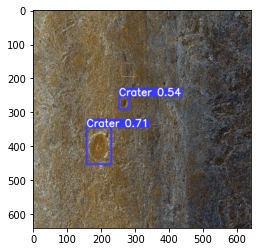

Image #  2


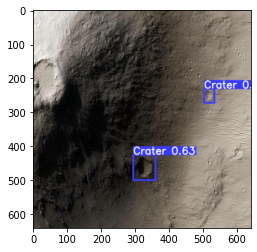

Image #  3


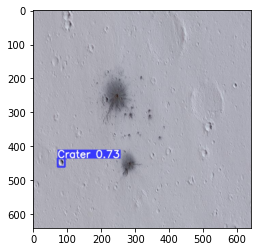

Image #  4


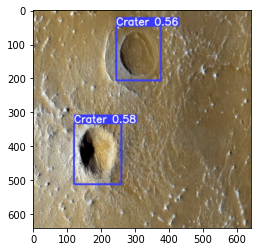

Image #  5


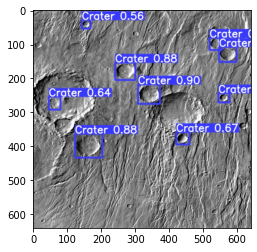

Image #  6


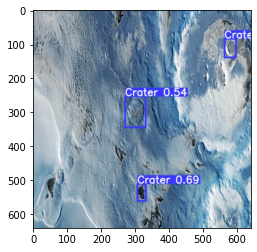

Image #  7


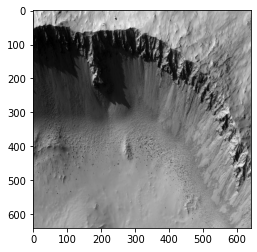

Image #  8


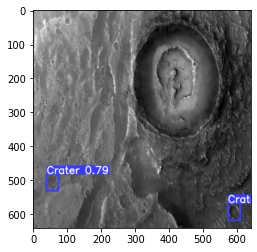

Image #  9


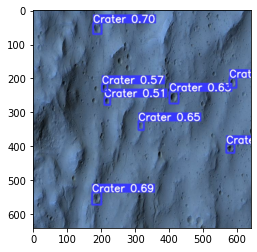

Image #  10


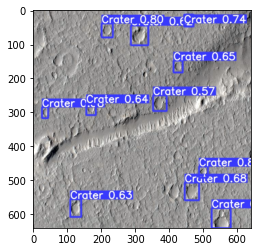

Image #  11


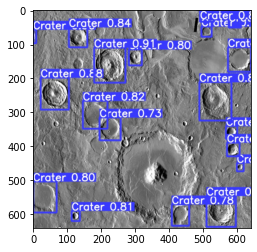

Image #  12


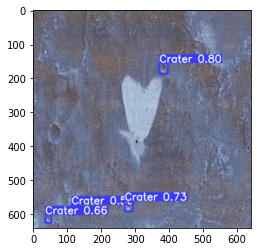

Image #  13


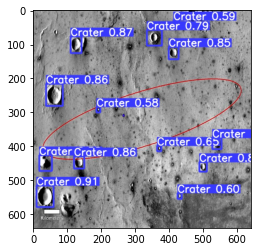

Image #  14


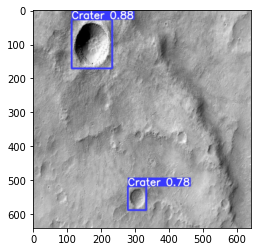

Image #  15


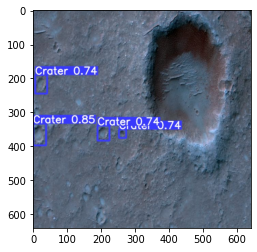

Image #  16


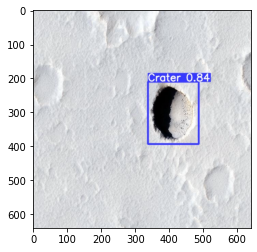

Image #  17


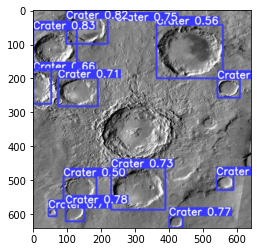

Image #  18


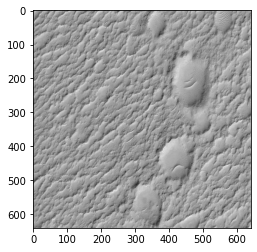

Image #  19


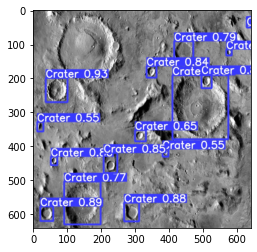

In [10]:
# Show sample of test images
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt

#Set folder from previous run (see last statement in previous output)
res_folder = 'exp' #<--- CHANGE THIS - most result results folder
img_path = wdir+'/yolov5/runs/detect/'+res_folder+'/'

i = 1
for image in os.listdir(img_path):
    if os.path.isfile(os.path.join(img_path, image)): #check if img, not folder
        img = cv2.imread(os.path.join(img_path, image))
        #print(img.shape)
        print('Image # ',i)
        i+=1
        plt.imshow(img)
        plt.show()

### Frame Locations

In [11]:
frame_path = wdir+'/yolov5/runs/detect/'+res_folder+'/labels/'
frames = []
i = 1

#Pull frame locations in image, store in dataframe
for file in os.listdir(frame_path):
    fpath = os.path.join(frame_path, file)
    df_temp = pd.read_csv(fpath, sep=' ', header=None)
    df_temp.iloc[:,0] = i
    i+=1
    frames.append(df_temp)

df = pd.concat(frames)
df = df.rename(columns={0:'img#', 1: "x1", 2:"y1", 3:'x2', 4:'y2', 5:'conf'})

#df.head()
df

img#        x1        y1        x2        y2      conf
0      1  0.339844  0.417188  0.026562  0.034375  0.508853
1      1  0.328125  0.356250  0.025000  0.034375  0.565236
2      1  0.646094  0.400781  0.042188  0.054688  0.630342
3      1  0.904688  0.634375  0.037500  0.040625  0.648223
4      1  0.495313  0.529688  0.025000  0.040625  0.654150
..   ...       ...       ...       ...       ...       ...
1     16  0.269531  0.154687  0.185937  0.225000  0.881824
0     17  0.410156  0.566406  0.032813  0.039062  0.737405
1     17  0.036719  0.339844  0.054688  0.085938  0.738651
2     17  0.322656  0.564062  0.054688  0.068750  0.738877
3     17  0.029687  0.570312  0.059375  0.100000  0.852287

[111 rows x 6 columns]

### Individual Craters

Each detected crater can be exported into an independent image. These images then can form the basis for crater identification, based on a set of known and labeled craters. This will be described further in the *Deployment* section. 

The crater number corresponds to the index number in the dataframe table above. 

Crater #  0


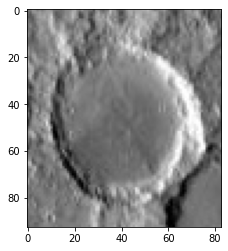

Crater #  1


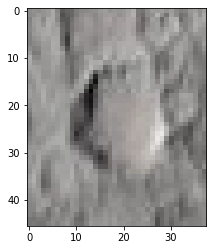

Crater #  2


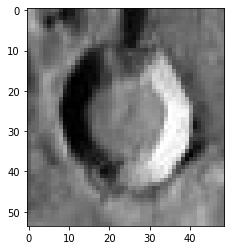

Crater #  3


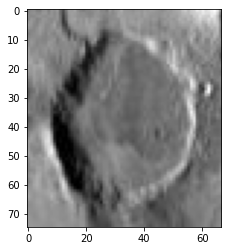

Crater #  4


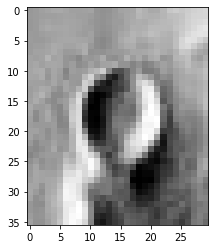

Crater #  5


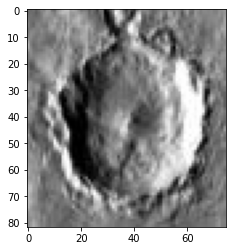

Crater #  6


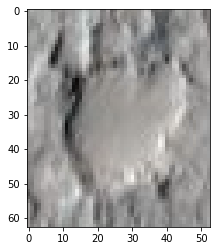

Crater #  7


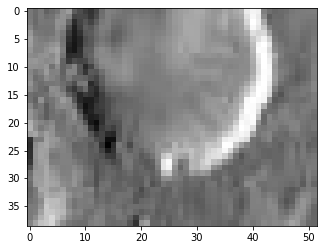

Crater #  8


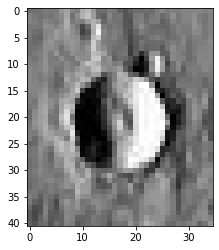

Crater #  9


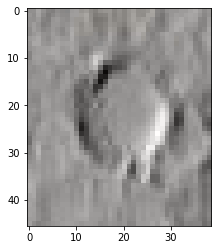

In [12]:
# Show sample of cropped crater images
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt

#Set folder from previous run (see last statement in previous output)
crop_path = img_path+'crops/Crater'

i = 0
for image in os.listdir(crop_path):
    temp_path = os.path.join(crop_path, image)
    if os.path.isfile(temp_path) and i < 10: #check if img, not folder; stop at 10 images
        img = cv2.imread(temp_path)
        #print(img.shape)
        print('Crater # ',i)
        i+=1
        plt.imshow(img)
        plt.show()

## Diagnosis

Now we can run the validation script *val.py* to see how well the model performed on the test data. This script will generate a long list of exceptions depending on the specific run, and these can be ignored. Like the previous scripts, this creates a new folder to store the validation results; it is important to capture this folder name for use in the following cells. 

### Validation

In [13]:
!python val.py --batch 64 --data ../data.yaml --weights $wpath --name 'validation'

val: data=../data.yaml, weights=['/Users/jware/Documents/School/AI_Systems/workspace/aisys/research_project/yolov5/runs/train/exp/weights/best.pt'], batch_size=64, imgsz=640, conf_thres=0.001, iou_thres=0.6, task=val, device=, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=validation, exist_ok=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 280 layers, 12308200 parameters, 0 gradients
val: Scanning '/Users/jware/Documents/School/AI_Systems/workspace/aisys/research
               Class     Images     Labels          P          R     mAP@.5 mAP@
                 all         26        202      0.731      0.485      0.527      0.206
Speed: 3.1ms pre-process, 599.2ms inference, 1.1ms NMS per image at shape (64, 3, 640, 640)
Results saved to runs/val/valid

confusion_matrix.png


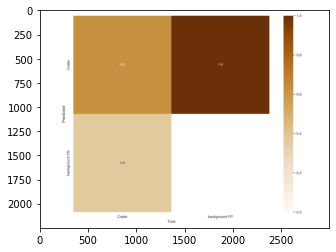

P_curve.png


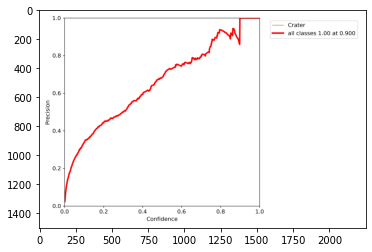

val_batch0_labels.jpg


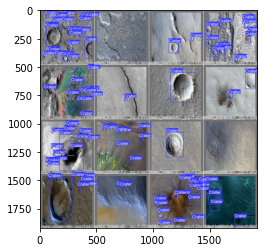

F1_curve.png


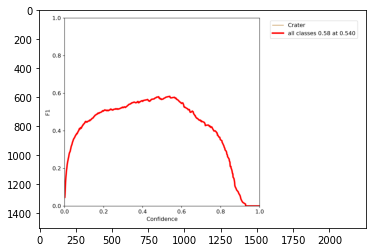

val_batch0_pred.jpg


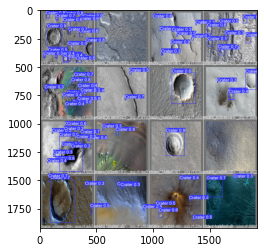

R_curve.png


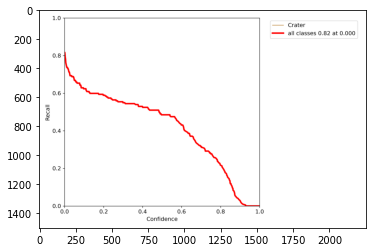

PR_curve.png


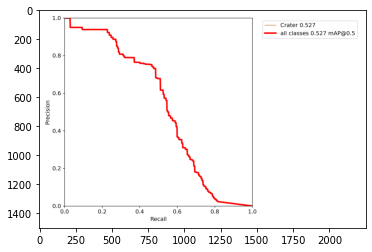

In [14]:
# Show validation results
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt

#Set folder from previous run (see last statement in previous output)
res_folder = 'validation' #<--- CHANGE THIS - most result results folder
val_path = wdir+'/yolov5/runs/val/'+res_folder+'/'

i = 0
for image in os.listdir(val_path):
    temp_path = os.path.join(val_path, image)
    if os.path.isfile(temp_path) and i < 20: #check if img, not folder; limit to 20
        img = cv2.imread(temp_path)
        i+=1
        print(image)
        plt.imshow(img)
        plt.show()

The confusion matrix shows that craters were detected appropriately roughly 62% of the time. This number would change depending on the confidence threshold we set for the initial detection algorithm (set here to 0.5). The PR curve shows the tradeoff between precision and recall. This graph has a relatively large area under the curve, which shows a balance between a low false-positive rate and a low false-negative rate, which was also shown in the confusion matrix. 

Comparing the predicted image versus the labels shows a few important considerations for future analysis and deployments. Some craters were identified with a different size bounding box than the labeled dataset; while these craters were still detected, this may create challenges when comparing these images against other databases for identification. There were also some circular features that were detected as craters, when in reality they were raised ridges or other topographical variations; since the dataset is visual only and does not include elevation data, it is difficult for computer vision to differentiate between these cases.  

### Additional Test Images

Now we can test the model with images outside of this dataset. Three images with variations in lighting, size, and features were chosen and shown below. The same process will be used to display the images, run the detection algorithm, and show the images with crater detection frames. 

Additional images to test:


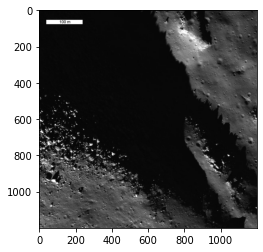

libpng warning: iCCP: known incorrect sRGB profile


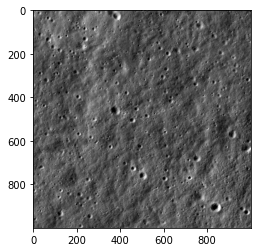

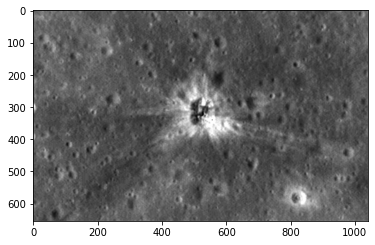

In [15]:
# Show additional testing images
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt

img_path = wdir + '/test/images4/' #sample image directory
print('Additional images to test:')

i = 1
for image in os.listdir(img_path):
    temp_path = os.path.join(img_path, image)
    if os.path.isfile(temp_path) and i < 4 and image != '.DS_Store': #check if img, not folder
        img = cv2.imread(temp_path)
        i+=1
        plt.imshow(img)
        plt.show()

In [16]:
#Set paths
wpath = wdir + '/yolov5/runs/train/exp/weights/best.pt' #weight path
#spath = wdir + '/test/images' #source path - Full image set
spath = wdir + '/test/images4' #source path - Partial image set

# Run test images through algo
!python detect.py --weights $wpath --img 1280 --conf 0.5 --source $spath --save-txt --save-conf --save-crop

detect: weights=['/Users/jware/Documents/School/AI_Systems/workspace/aisys/research_project/yolov5/runs/train/exp/weights/best.pt'], source=/Users/jware/Documents/School/AI_Systems/workspace/aisys/research_project/test/images4, data=data/coco128.yaml, imgsz=[1280, 1280], conf_thres=0.5, iou_thres=0.45, max_det=1000, device=, view_img=False, save_txt=True, save_conf=True, save_crop=True, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False
YOLOv5 🚀 v6.1-177-gd059d1d torch 1.11.0 CPU

Fusing layers... 
[W NNPACK.cpp:51] Could not initialize NNPACK! Reason: Unsupported hardware.
Model summary: 280 layers, 12308200 parameters, 0 gradients
image 1/3 /Users/jware/Documents/School/AI_Systems/workspace/aisys/research_project/test/images4/477388main_PIA13038_full.jpeg: 1280x1280 Done. (1.921s)
image 2/3 /Users/jware/Documents/School/

Addtl Image #  1


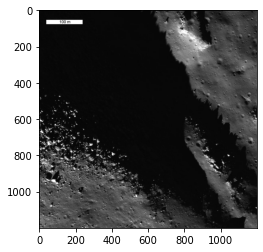

Addtl Image #  2


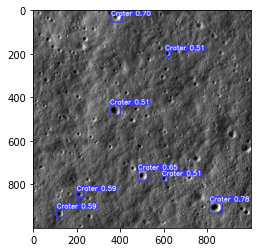

Addtl Image #  3


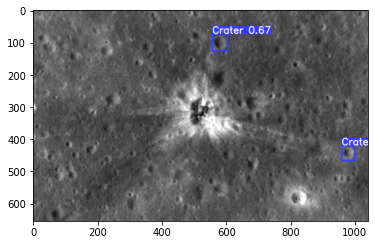

In [17]:
# Show sample of test images
from IPython.display import Image
import cv2
import matplotlib.pyplot as plt

#Set folder from previous run (see last statement in previous output)
res_folder = 'exp2' #<--- CHANGE THIS - most result results folder
img_path = wdir+'/yolov5/runs/detect/'+res_folder+'/'

i = 1
for image in os.listdir(img_path):
    if os.path.isfile(os.path.join(img_path, image)): #check if img, not folder
        img = cv2.imread(os.path.join(img_path, image))
        #print(img.shape)
        print('Addtl Image # ',i)
        i+=1
        plt.imshow(img)
        plt.show()

While we don't have labeled frames for these images, a visual inspection shows that performance does not seem to be as high as the other elements of the dataset. The first image is mostly dark as a result of the shadow from the ridge line in the bottom left; while there seem to be craters in the upper right corner of the image, these are rather small and not detected. The second image has detections for many of the obvious craters, but misses several of the smaller craters as well. And the third image shows a similar story - it is visually apparent that several craters were missed. 

The detection algorithm was able to handle a variety of image sizes without manual pre-processing, and it seems to handle color variations as well. Overall, the algorithm seems to favor large distinct craters over smaller uniform ones. This will likely be helpful in comparing these individual distinct craters to crater identification databases, as the more prevalent features will be easier to identify across models. 

## Deployment

This completes steps 1 through 4 listed in the *Decomposition* section. The trained model can now detect craters from static imagery, and output the location of those craters in the image frame. This is the critical foundation for any further deployment of this capability. 

### Crater Identification
The next important step for terrain relative navigation is to determine where on the Moon (or Mars) the spacecraft is looking; this can start with the individual frame outputs for single craters. These images could be passed through a separate model to find an applicable match. 

This would require an existing database and model of known notable crater images, labeled with information like size, latitude, longitude, and elevation. Each crater in the database would ideally have multiple images from various perspectives and in a variety of lighting conditions. A parallel on Earth would be a database that contained images and information for notable features like the Grand Canyon, Crater Lake, and Lake Michigan. 

From here, a convolutional neural network could be crafted similar to those used in facial recognition applications; the labeled features would provide the training and classification data. This would become the model through which we would pass cropped crater images. Once an individual crater is classified in this model, the associated meta data (lat/long/elevation) can be pulled for the next step of spacecraft position calculations. 

### Latitude & Longitude
At this point, we have an image captured from a spacecraft, the image contains a known crater, and we know the absolute latitude and longitude of that known crater on the planetary body (Moon or Mars). Now we can locate the crater within the image using the output frame locations. If we can constrain the spacecraft sensor to always be pointed to the center of the body (a common attitude constraint for spacecraft), we can create two vectors from the center of the body to the center of the image, and the center of the known crater. Using the frame location coordinates, we can measure the angular distance between these vectors, and determine the latitude and longitude of the spacecraft vector. 

For this to work, it may be necessary to know the altitude of the spacecraft. This can be measured using onboard sensors (like lidar), or calculated from the camera resolution and pixel size of the known crater in the image. 

### Onboard vs. On Earth
Turning this into an operational capability would require a split in computing power and data storage. Both the crater detection and identification models would be created and validated on Earth, using high power computing resources (likely in the cloud). The trained models would need to reside on the spacecraft to enable rapid computing in environments where the one-way light time delay could be several seconds or several minutes. Position and state estimation would be performed onboard the spacecraft as well, following crater detection and identification. 

### Future Work
This design has been focused on analyzing static imagery captured from onboard sensors. This same approach and algorithm (YOLOv5) can be used to analyze video at speeds exceeding 100 frames per second. Pivoting to this sort of deployment would certainly benefit the spacecraft terrain relative navigation application. By analyzing video frames, the rate of change in location for craters can also be measured; this can help calculate orbital velocity and altitude above the planetary surface. 

# References
* *Training Sample:* https://www.kaggle.com/code/lincolnzh/train-sample-with-yolov5/notebook
* *YOLOv5 Documentation:* https://docs.ultralytics.com/ 
* *Example YOLOv5 Guide:* https://towardsdatascience.com/the-practical-guide-for-object-detection-with-yolov5-algorithm-74c04aac4843
* *Weights & Biases:* https://wandb.ai/home
* *TRN Paper:* Overview of Terrain Relative Navigation Approaches for Precise Lunar Landing: A. E. Johnson and J. F. Montgomery. SciTech 2020 Forum, Orlando, Florida, 2020.*
* *LRO:* https://lunar.gsfc.nasa.gov/
* *LRO Imagery:* https://www.nasa.gov/mission_pages/LRO/images/index.html
* *Training with custom data example:* https://github.com/ultralytics/yolov5/wiki/Train-Custom-Data
* *Precision-Recall Explanation:* https://scikit-learn.org/stable/auto_examples/model_selection/plot_precision_recall.html#:~:text=The%20precision%2Drecall%20curve%20shows,a%20low%20false%20negative%20rate.

In [18]:
detections = pycda.CDA().predict(image)

NameError: name 'pycda' is not defined

In [ ]:
# Show set of example images 
_path = os.getcwd()
path = _path + '/craters/train/images/'

image = load_image(path+'01_png.rf.4d2ebc5ed98ad1e69d667aadbce63d53.jpg')
image.show();


In [ ]:
pred = get_prediction(image, verbose=True)

In [ ]:
#Read in Images

_path = os.getcwd()
path = _path + '/craters/train/images/'


#imgs = ['BikeShot1.jpeg', 'BikeShot2.jpeg', 'BikeShot3.jpeg', 'BikeShot4.jpq.png']
imgs = ['01_png.rf.4d2ebc5ed98ad1e69d667aadbce63d53.jpg']
img_arr = []

for img in imgs:
  image = io.imread(img)
  image_2 = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) #Color conversion
  img_arr += [image_2]
  cv2.imshow(image_2) 
  print(image_2.shape) 
  print('\n')